In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Load dataset
df = pd.read_csv('sales_data.csv', encoding='Latin-1')


In [20]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [21]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [22]:
# Remove PRODUCTCODE
df = df.drop(columns=['PRODUCTCODE'])

# Remove address fields
df = df.drop(columns=['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'TERRITORY', 'CITY', 'STATE', 'COUNTRY'])

# Remove attributes that uniquely identify the customer or the order
df = df.drop(columns=['CUSTOMERNAME', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'PHONE'])

df = pd.get_dummies(df, columns=['PRODUCTLINE'])

df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,95,False,True,False,False,False,False,False
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,95,False,True,False,False,False,False,False
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,95,False,True,False,False,False,False,False
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,95,False,True,False,False,False,False,False
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,95,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,54,False,False,False,True,False,False,False
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,54,False,False,False,True,False,False,False
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,54,False,False,False,True,False,False,False
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,54,False,False,False,True,False,False,False


In [23]:
# convert ORDERDATE to numeric attribute
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['ORDERDATE'] = df['ORDERDATE'].astype('int64')

df['STATUS'] = df['STATUS'].replace('Shipped',1)
df['STATUS'] = df['STATUS'].replace('Resolved', 2)
df['STATUS'] = df['STATUS'].replace('Cancelled', 3)
df['STATUS'] = df['STATUS'].replace('On Hold', 4)
df['STATUS'] = df['STATUS'].replace('Disputed', 5)
df['STATUS'] = df['STATUS'].replace('In Process', 6)

/tmp/ipykernel_3274/3271196588.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['STATUS'] = df['STATUS'].replace('In Process', 6)


In [25]:
df.describe()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2.823000e+03,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,1.084235e+18,1.198371,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.992714e+16,0.803278,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.041811e+18,1.000000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,1.068120e+18,1.000000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,1.087258e+18,1.000000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,1.100693e+18,1.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,1.117498e+18,6.000000,4.000000,12.000000,2005.00000,214.000000


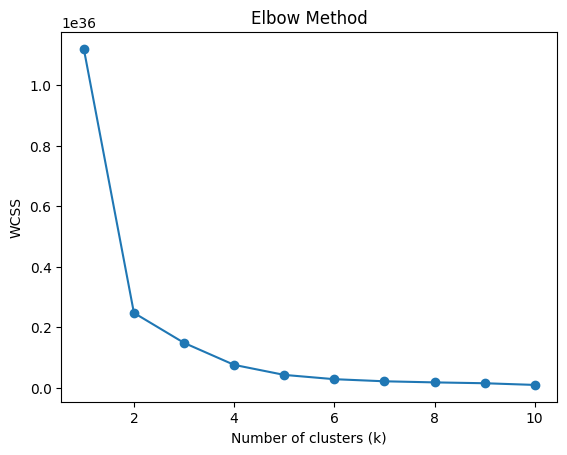

In [26]:

# ELBOW METHOD to find optimal K
dataset = df.values
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(dataset)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Choose k=3 (from elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(dataset)
centroids = kmeans.cluster_centers_

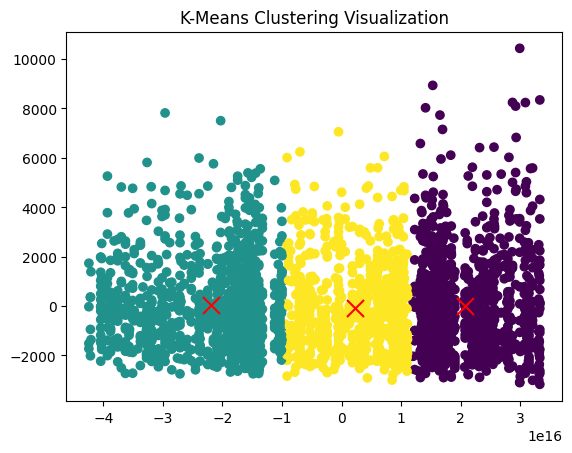

In [ ]:
# PCA Visualization
pca = PCA(2)
reduced_data = pca.fit_transform(dataset)
reduced_centroids = pca.transform(centroids)

plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap='viridis')
plt.scatter(reduced_centroids[:,0], reduced_centroids[:,1], marker='x', s=150, c='red')
plt.title('K-Means Clustering Visualization')
plt.show()

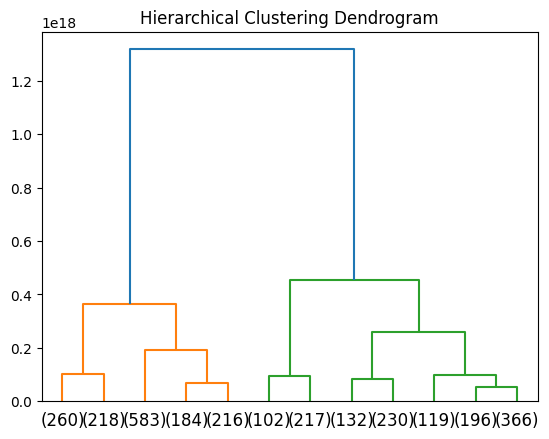

In [33]:
# Hierarchical Clustering
Z = linkage(dataset, 'ward')
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()